### 1. Define a manifold and introduce a Schwarzschild like chart on that manifold

In [1]:
M = Manifold(4, 'M', structure='Lorentzian')
print(M)

4-dimensional Lorentzian manifold M


In [14]:
%display latex
X.<t,r,th,ph> = M.chart(r"t r:(0,+oo) th:(0,pi):\theta ph:\phi")
X

Chart (M, (t, r, th, ph))

### 2. Introduce the Kerr metric

In [3]:
m = var('m')
J = var('J')
assume(m>=0)

g = M.metric()
a = J/m
delta = r*r - 2*m*r + a*a
rho_sq = r*r + (a*cos(th))^2

g[0,0] = -(1-2*m*r/rho_sq)
g[0,3] = -(4*m*a*r*sin(th)^2)/rho_sq
g[2,2] = r^2
g[1,1] = (r^2)/delta
g[3,3] = (r^2 + a^2 + (2*m*a^2*r*sin(th)^2)/rho_sq)*sin(th)^2
g.display()

g = (2*m*r/(r^2 + J^2*cos(th)^2/m^2) - 1) dt*dt - 4*J*r*sin(th)^2/(r^2 + J^2*cos(th)^2/m^2) dt*dph - r^2/(2*m*r - r^2 - J^2/m^2) dr*dr + r^2 dth*dth - 4*J*r*sin(th)^2/(r^2 + J^2*cos(th)^2/m^2) dph*dt + (2*J^2*r*sin(th)^2/((r^2 + J^2*cos(th)^2/m^2)*m) + r^2 + J^2/m^2)*sin(th)^2 dph*dph

In [4]:
R3 = Manifold(3, 'R^3', latex_name=r'\mathbb{R}^3')
X3.<x,y,z> = R3.chart()
to_R3 = M.diff_map(R3, {(X, X3): [r*sin(th)*cos(ph), 
                                  r*sin(th)*sin(ph), r*cos(th)]})
to_R3.display()

M --> R^3
   (t, r, th, ph) |--> (x, y, z) = (r*cos(ph)*sin(th), r*sin(ph)*sin(th), r*cos(th))

### 3. Find initial conditions for calculating a timelike geodesic and initial conditions for calculating a null geodesic. Integrate the orbits shooting towards the black hole and plot the trajectories for a photon scattered by the black hole and a particle orbiting the black hole. Use equatorial orbits and assume that M=1 and a=0.5M

In [5]:
par = var('par')

p0 = M.point((0, 8*m, pi/2, 1e-12), name='p_0')
v0 = M.tangent_space(p0)((1.3, 0, 0, 0.0640625/par), name='v_0')

v0.display()
to_R3.display()

v0.parent()
g.at(p0)(v0, v0)

-0.0832812500000000*J/(m*par) + 0.00102600097656250*(256*m^4 + 5*J^2)/(m^2*par^2) - 1.26750000000000

In [7]:
# looking for a parameter(par) in order to calculate the timelike geodesic , norm = -1

sol1 = solve(g.at(p0)(v0, v0)+1,par)
display(sol1)

[par == -41/6848*(26*J + sqrt(27392*m^4 + 1211*J^2))/m, par == -41/6848*(26*J - sqrt(27392*m^4 + 1211*J^2))/m]

In [8]:
new_par = par.subs(sol1[1])
display(new_par)

-41/6848*(26*J - sqrt(27392*m^4 + 1211*J^2))/m

In [9]:
# updating v0 

v0_new = M.tangent_space(p0)((1.3, 0, 0, 0.0640625/new_par), name='v_{0_{new}}')
v0_new.parent()
v0_new.display()

v_{0_{new}} = 1.30000000000000 d/dt - 10.7000000000000*m/(26*J - sqrt(27392*m^4 + 1211*J^2)) d/dph

In [10]:
# checking if the geodesic is timelike

t_check=g.at(p0)(v0_new, v0_new)
numerical_approx(t_check.substitute(m=1,J=1/2))

-1.00000000000000

In [50]:
# ellipsoid graph - Kerr BH Horizon (let's say)
# remember a = 0.5
# r+ = M + sqrt(M^2 - a^2)

r_plus = 1+sqrt(3)/2  
a1 = sqrt(2*r_plus)
a2 = a1
a3 = r_plus
ellipsoid = surfaces.Ellipsoid(center=(0, 0, 0), axes=(a1, a2, a3))
ellipsoid.plot(viewer='threejs')

Graphics3d Object

In [51]:
s = var('s')
geod = M.integrated_geodesic(g, (s, 0, 2490), v0_new); geod

sol = geod.solve(parameters_values={m: 1, J: 1/2})  # numerical integration
interp = geod.interpolate()                         # interpolation of the solution for the plot

# plotting particle orbit
# the geodesic
graph = geod.plot_integrated(chart=X3, mapping=to_R3, plot_points=5000, thickness=2, label_axes=False)          
graph += p0.plot(chart=X3, mapping=to_R3, size=4, parameters={m: 1, J: 1/2})  # the starting point
# graph += sphere(size=horizon, color='grey')# the event horizon
graph += ellipsoid.plot(color='grey')
show(graph, viewer='threejs', online=True)


Graphics3d Object

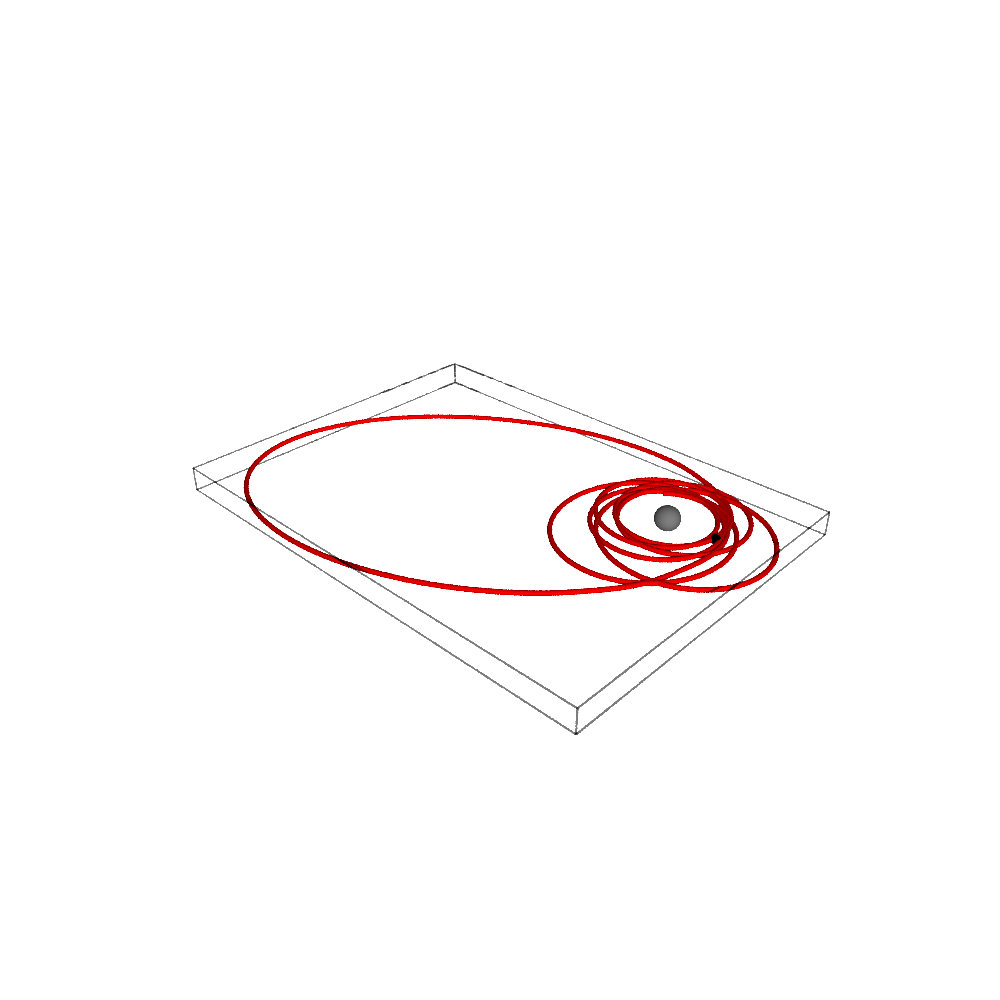

In [52]:
show(graph, viewer='tachyon', aspect_ratio=1, figsize=10)

In [77]:
par2 = var('par2')

p02 = M.point((0, 5*m, pi/2, 1e-12), name='p_02')
v02 = M.tangent_space(p02)((1.3, -0.005/par2, 0, 0.1), name='v_02')

v02.parent()
g.at(p02)(v02, v02)

0.000625000000000000*m^4/((15*m^4 + J^2)*par2^2) - 0.208000000000000*J/m + 0.00200000000000000*(125*m^4 + 7*J^2)/m^2 - 1.01400000000000

In [78]:
# looking for a parameter(par2) in order to calculate the null geodesic

sol2 = solve(g.at(p02)(v02, v02),par2)
display(sol2)

[par2 == -1/4*sqrt(5)*m^3*sqrt(-1/(1875*m^8 + 230*J^2*m^4 - 1560*J*m^5 - 7605*m^6 + 7*J^4 - 104*J^3*m - 507*J^2*m^2)), par2 == 1/4*sqrt(5)*m^3*sqrt(-1/(1875*m^8 + 230*J^2*m^4 - 1560*J*m^5 - 7605*m^6 + 7*J^4 - 104*J^3*m - 507*J^2*m^2))]

In [79]:
new_par2 = par2.subs(sol2[1])
display(new_par2)

1/4*sqrt(5)*m^3*sqrt(-1/(1875*m^8 + 230*J^2*m^4 - 1560*J*m^5 - 7605*m^6 + 7*J^4 - 104*J^3*m - 507*J^2*m^2))

In [80]:
# updating v02 

v02_new = M.tangent_space(p02)((1.3, -0.005/new_par2, 0, 0.1), name='v_{02_{new}}')
v02_new.parent()
v02_new.display()

v_{02_{new}} = 1.30000000000000 d/dt - 0.00400000000000000*sqrt(5)/(m^3*sqrt(-1/(1875*m^8 + 230*J^2*m^4 - 1560*J*m^5 - 7605*m^6 + 7*J^4 - 104*J^3*m - 507*J^2*m^2))) d/dr + 0.100000000000000 d/dph

In [81]:
# checking if the geodesic is null

t_check2=g.at(p02)(v02_new, v02_new)
numerical_approx(t_check2.substitute(m=1,J=1/2))

0.000000000000000

In [82]:
s2 = var('s2')
geod2 = M.integrated_geodesic(g, (s2, 0, 20), v02_new); geod2

sol2 = geod2.solve(parameters_values={m: 1, J: 1/2},step=0.1)  # numerical integration
interp = geod2.interpolate()                         # interpolation of the solution for the plot

# plotting scattered photon trajectory
# the geodesic

graph2 = geod2.plot_integrated(chart=X3, mapping=to_R3, plot_points=5000, thickness=2, label_axes=False)          
graph2 += p02.plot(chart=X3, mapping=to_R3, size=4, parameters={m: 1, J: 1/2})  # the starting point
graph2 += ellipsoid.plot(color='grey',opacity=0.7)
# graph2 += sphere(size=horizon, color='grey',opacity=0.5)                                         # the event horizon
show(graph2, viewer='threejs', online=True)

Graphics3d Object

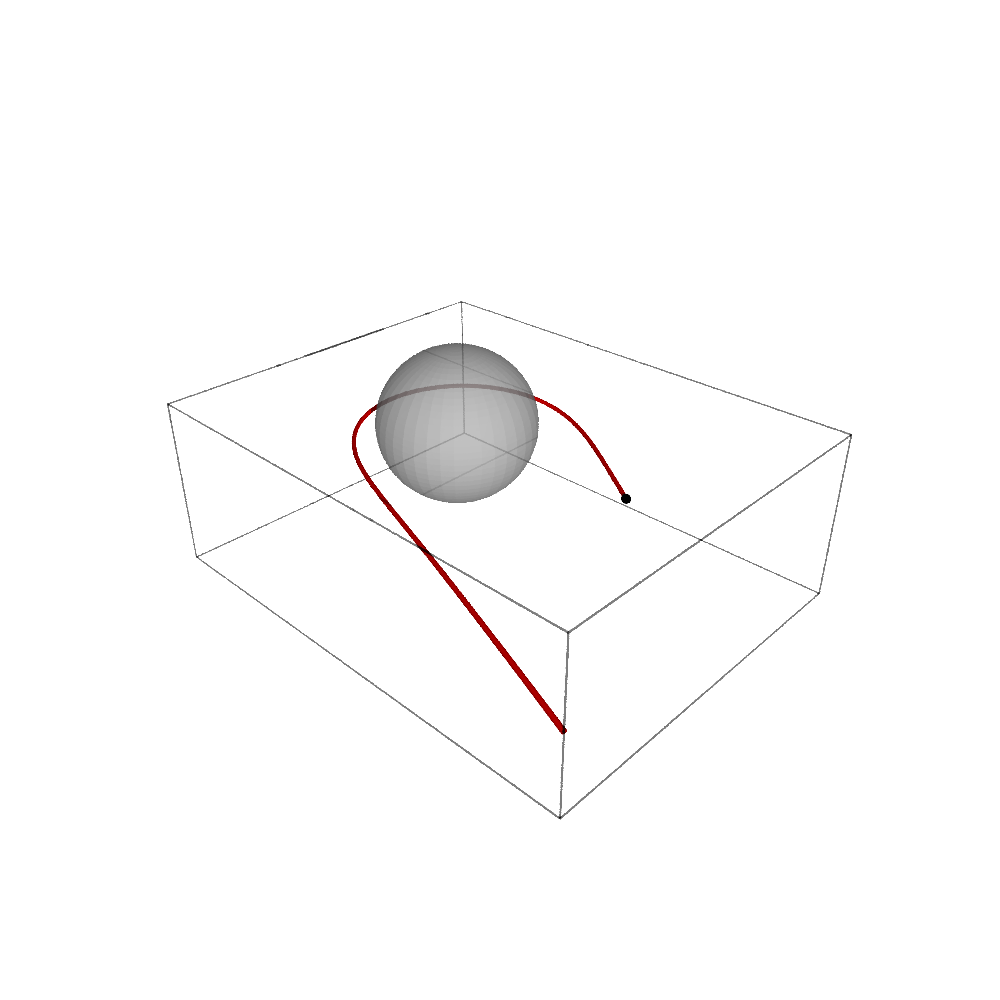

In [83]:
show(graph2, viewer='tachyon', aspect_ratio=1, figsize=10)

### 4. By trial and error try to find a zoom-whirl photon orbit in Kerr

In [92]:
par3 = var('par3')

p03 = M.point((0, 5*m, pi/2, 1e-12), name='p_02')
v03 = M.tangent_space(p02)((1.3, -0.005/par3, 0, 0.0848), name='v_03')

v03.parent()
g.at(p03)(v03, v03)

0.000625000000000000*m^4/((15*m^4 + J^2)*par3^2) - 0.176384000000000*J/m + 0.00143820800000000*(125*m^4 + 7*J^2)/m^2 - 1.01400000000000

In [93]:
# looking for a parameter(par3) in order to calculate the null geodesic

sol3 = solve(g.at(p03)(v03, v03),par3)
display(sol3)

[par3 == -125/4*sqrt(5)*m^3*sqrt(-1/(21067500*m^8 + 2584280*J^2*m^4 - 20670000*J*m^5 - 118828125*m^6 + 78652*J^4 - 1378000*J^3*m - 7921875*J^2*m^2)), par3 == 125/4*sqrt(5)*m^3*sqrt(-1/(21067500*m^8 + 2584280*J^2*m^4 - 20670000*J*m^5 - 118828125*m^6 + 78652*J^4 - 1378000*J^3*m - 7921875*J^2*m^2))]

In [94]:
new_par3 = par3.subs(sol3[1])
display(new_par3)

125/4*sqrt(5)*m^3*sqrt(-1/(21067500*m^8 + 2584280*J^2*m^4 - 20670000*J*m^5 - 118828125*m^6 + 78652*J^4 - 1378000*J^3*m - 7921875*J^2*m^2))

In [95]:
# updating v03

v03_new = M.tangent_space(p03)((1.3, -0.005/new_par3, 0, 0.0848), name='v_{03_{new}}')
v03_new.parent()
v03_new.display()

v_{03_{new}} = 1.30000000000000 d/dt - 0.0000320000000000000*sqrt(5)/(m^3*sqrt(-1/(21067500*m^8 + 2584280*J^2*m^4 - 20670000*J*m^5 - 118828125*m^6 + 78652*J^4 - 1378000*J^3*m - 7921875*J^2*m^2))) d/dr + 0.0848000000000000 d/dph

In [96]:
# checking if the geodesic is null

t_check3 = g.at(p03)(v03_new, v03_new)
numerical_approx(t_check3.substitute(m=1,J=1/2))

1.94289029309402e-16

In [97]:
s3 = var('s3')
geod3 = M.integrated_geodesic(g, (s3, 0, 20), v03_new); geod3

sol3 = geod3.solve(parameters_values={m: 1, J: 1/2},step=0.1)  # numerical integration
interp = geod3.interpolate()                         # interpolation of the solution for the plot

# plotting zoom-whirl photon orbit
# the geodesic
graph3 = geod3.plot_integrated(chart=X3, mapping=to_R3, plot_points=5000, thickness=2, label_axes=False)          
graph3 += p03.plot(chart=X3, mapping=to_R3, size=4, parameters={m: 1, J: 1/2})  # the starting point
graph3 += ellipsoid.plot(color='grey',opacity=0.7)
# graph2 += sphere(size=horizon, color='grey',opacity=0.5)                                         # the event horizon
show(graph3, viewer='threejs', online=True)

Graphics3d Object

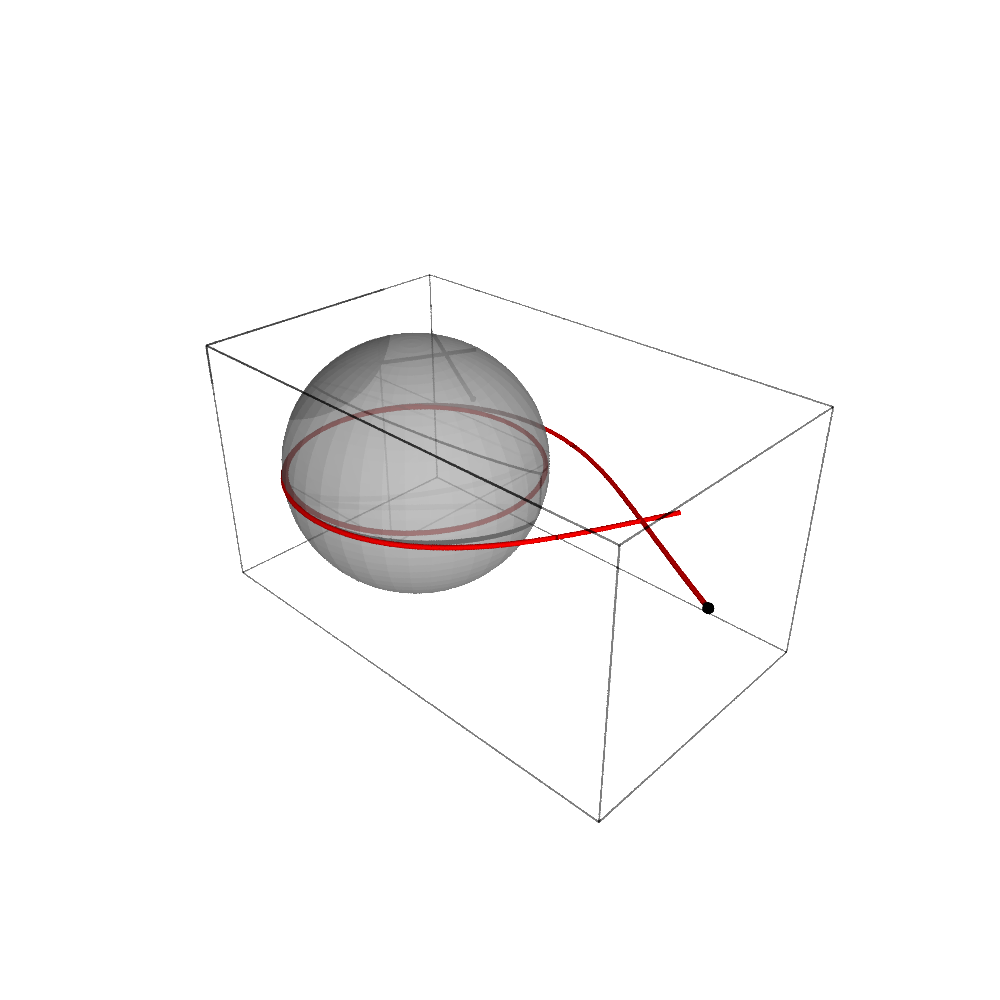

In [98]:
show(graph3, viewer='tachyon', aspect_ratio=1, figsize=10)

### 5. Find initial conditions off the equatorial plane and integrate a timelike geodesic that orbits the Kerr black hole in an elliptic orbit. Plot the orbit.

In [99]:
par4 = var('par4')

p04 = M.point((0, 8*m, 3*pi/4, 1e-12), name='p_04')
v04 = M.tangent_space(p04)((1.3, 0, 0, 0.0640625/par4), name='v_04')

v04.display()
to_R3.display()

v0.parent()
g.at(p04)(v04, v04)

-5.33000000000000*J*m^3/((128*m^4 + J^2)*par4) - 1.69000000000000*(96*m^4 + J^2)/(128*m^4 + J^2) + 0.00205200195312500*(8192*m^8 + 208*J^2*m^4 + J^4)/((128*m^6 + J^2*m^2)*par4^2)

In [101]:
# looking for a parameter(par) in order to calculate the timelike geodesic

sol4 = solve(g.at(p04)(v04, v04)+1,par4)
display(sol4)

[par4 == -41/128*(832*J*m^4 + sqrt(56098816*m^12 + 3247104*J^2*m^8 + 35552*J^4*m^4 + 138*J^6))/(3424*m^5 + 69*J^2*m), par4 == -41/128*(832*J*m^4 - sqrt(56098816*m^12 + 3247104*J^2*m^8 + 35552*J^4*m^4 + 138*J^6))/(3424*m^5 + 69*J^2*m)]

In [102]:
new_par4 = par4.subs(sol4[1])
display(new_par4)

-41/128*(832*J*m^4 - sqrt(56098816*m^12 + 3247104*J^2*m^8 + 35552*J^4*m^4 + 138*J^6))/(3424*m^5 + 69*J^2*m)

In [103]:
# updating v04

v04_new = M.tangent_space(p04)((1.3, 0, 0, 0.0640625/new_par4), name='v_{04_{new}}')
v04_new.parent()
v04_new.display()

v_{04_{new}} = 1.30000000000000 d/dt - 0.200000000000000*(3424*m^5 + 69*J^2*m)/(832*J*m^4 - sqrt(56098816*m^12 + 3247104*J^2*m^8 + 35552*J^4*m^4 + 138*J^6)) d/dph

In [104]:
# checking if the geodesic is timelike

t_check4 = g.at(p04)(v04_new, v04_new)
numerical_approx(t_check4.substitute(m=1,J=1/2))

-1.00000000000000

In [105]:
s4 = var('s4')
geod4 = M.integrated_geodesic(g, (s4, 0, 1500), v04_new); geod4

sol4 = geod4.solve(parameters_values={m: 1, J: 1/2})  # numerical integration
interp = geod4.interpolate()                         # interpolation of the solution for the plot

# plotting timelike geodesic that orbits the Kerr black hole in an elliptic orbit

graph4 = geod4.plot_integrated(chart=X3, mapping=to_R3, plot_points=5000, thickness=2, label_axes=False)          
graph4 += p04.plot(chart=X3, mapping=to_R3, size=4, parameters={m: 1, J: 1/2})  # the starting point
#graph4 += sphere(size=horizon, color='grey',opacity=0.5) 
graph4 += ellipsoid.plot(color='grey',opacity=0.75)# the event horizon
show(graph4, viewer='threejs', online=True)

Graphics3d Object

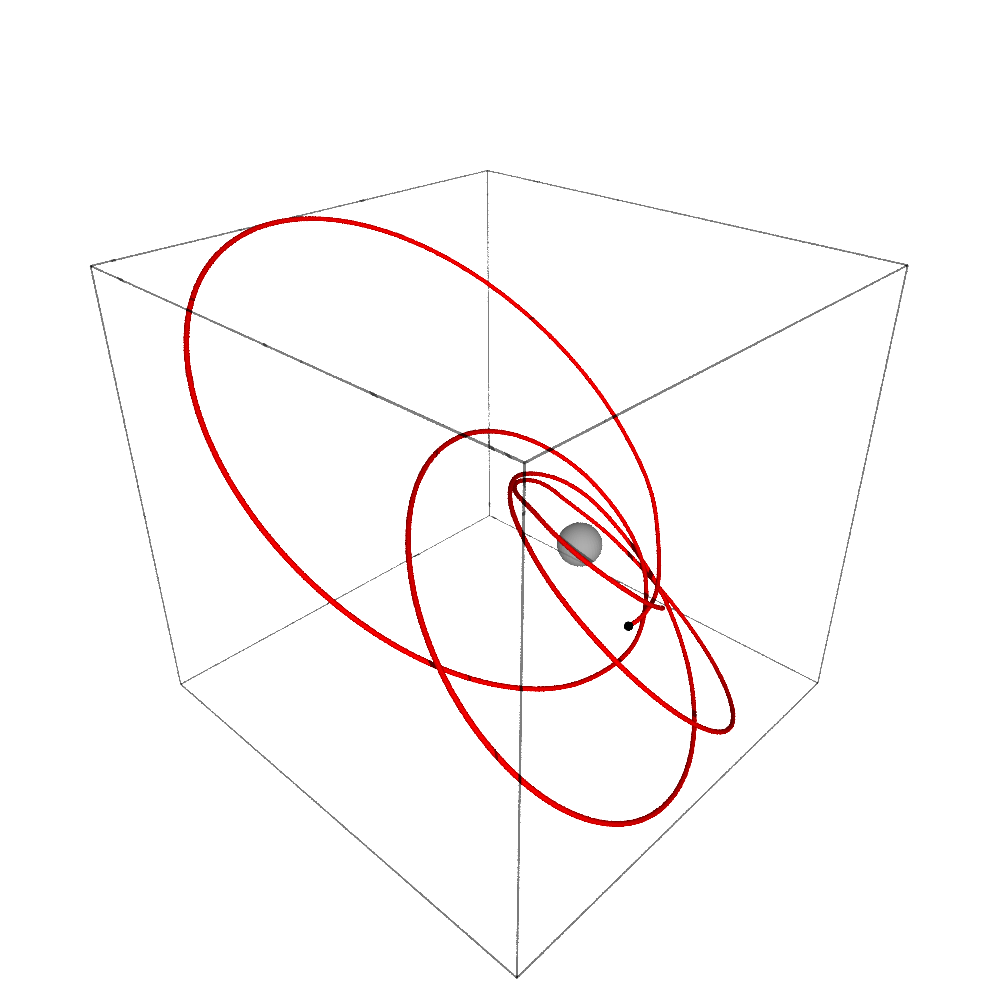

In [106]:
show(graph4, viewer='tachyon', aspect_ratio=1, figsize=10)